In [16]:
import random

In [15]:
hello_to_someone = '''
say_hello = names hello 
names = name names | name 
name = 张三 | 李四 | Jhon
hello = 您好 | 你来了 | 进来坐 
tail = 呀 | ！
'''

In [4]:
def name():
    return random.choice('张三 | 李四 | Jhon'.split('|'))

In [5]:
def hello():
    return random.choice('您好 | 你来了 | 进来坐'.split('|'))

In [6]:
def say_hello():
    return name() + ' ' + hello()

In [14]:
say_hello()

'张三  您好 '

In [38]:
hello_rules = '''
say_hello = names hello tail 
names = name names | name 
name = 张三 | 李四 | Jhon
hello = 您好 | 你来了 | 进来坐 
tail = 呀 | ！
'''

In [40]:
'add = number + number'

'add = number + number'

In [94]:
def get_generation_by_gram(grammar_str: str, target, stmt_split='=', or_split='|'):
    
#     stmt_split = '='
#     or_split = '|'
    rules = dict() # key is the @statement, value is @expression
    for line in grammar_str.split('\n'):
        if not line: continue 
    #     skip the epty line

        stmt, expr = line.split(stmt_split)

        print(stmt, expr.split(or_split))

        rules[stmt.strip()] = expr.split(or_split)
    generated = generate(rules, target=target)
    
    return generated

In [97]:
def generate(grammar_rule,target):
    if target in grammar_rule:   #names
        candidates = grammar_rule[target]   #['name names', 'name']
        candidate = random.choice(candidates)   #'name names', 'name'
        return ''.join(generate(grammar_rule,target=c.strip())for c in candidate.split())
    else:
        return target

In [98]:
get_generation_by_gram(hello_rules, target='say_hello')

say_hello  [' names hello tail ']
names  [' name names ', ' name ']
name  [' 张三 ', ' 李四 ', ' Jhon']
hello  [' 您好 ', ' 你来了 ', ' 进来坐 ']
tail  [' 呀 ', ' ！']


'张三李四进来坐！'

In [95]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的"""

In [99]:
get_generation_by_gram(simple_grammar, target='sentence', stmt_split='=>')

sentence  [' noun_phrase verb_phrase']
noun_phrase  [' Article Adj* noun']
Adj*  [' Adj ', ' Adj Adj*']
verb_phrase  [' verb noun_phrase']
Article  ['  一个 ', ' 这个']
noun  ['   女人 ', '  篮球 ', ' 桌子 ', ' 小猫']
verb  [' 看着   ', '  坐在 ', '  听着 ', ' 看见']
Adj  ['   蓝色的 ', '  好看的 ', ' 小小的']


'一个蓝色的小小的好看的桌子看见一个小小的蓝色的蓝色的好看的蓝色的女人'

In [107]:
simpel_programming = '''
if_stmt => if ( cond ) { stmt }
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  char var | char
char => a | b |  c | d | 0 | 1 | 2 | 3
'''

In [109]:
for i in range(10):
    print(get_generation_by_gram(simpel_programming, target='if_stmt', stmt_split='=>'))

if_stmt  [' if ( cond ) { stmt }']
cond  [' var op var']
op  [' ', ' == ', ' < ', ' >= ', ' <= ']
stmt  [' assign ', ' if_stmt']
assign  [' var = var']
var  ['  char var ', ' char']
char  [' a ', ' b ', '  c ', ' d ', ' 0 ', ' 1 ', ' 2 ', ' 3']
if(c011b<=c){b3=1bc}
if_stmt  [' if ( cond ) { stmt }']
cond  [' var op var']
op  [' ', ' == ', ' < ', ' >= ', ' <= ']
stmt  [' assign ', ' if_stmt']
assign  [' var = var']
var  ['  char var ', ' char']
char  [' a ', ' b ', '  c ', ' d ', ' 0 ', ' 1 ', ' 2 ', ' 3']
if(c==11b){2=2}
if_stmt  [' if ( cond ) { stmt }']
cond  [' var op var']
op  [' ', ' == ', ' < ', ' >= ', ' <= ']
stmt  [' assign ', ' if_stmt']
assign  [' var = var']
var  ['  char var ', ' char']
char  [' a ', ' b ', '  c ', ' d ', ' 0 ', ' 1 ', ' 2 ', ' 3']
if(1b){c0=00}
if_stmt  [' if ( cond ) { stmt }']
cond  [' var op var']
op  [' ', ' == ', ' < ', ' >= ', ' <= ']
stmt  [' assign ', ' if_stmt']
assign  [' var = var']
var  ['  char var ', ' char']
char  [' a ', ' b ', '  c ', ' d

In [53]:
rules['name']

[' 张三 ', ' 李四 ', ' Jhon']

In [54]:
rules['names']

[' name names ', ' name ']

In [55]:
rules['name']

[' 张三 ', ' 李四 ', ' Jhon']

In [86]:
generate(rules, target='say_hello')

'李四 张三 您好 呀'

## Language Model
## Input: Sentence(w1..wn)
## Output: Pribability(0-1)
## 2-Gram

$$ Pr(sentence) = Pr(w_1 \cdot w_2 \cdots w_n) = \prod \frac{count(w_i, w_{i+1})}{count(w_i)}$$

In [114]:
corpus = 'C:/Users/Lenovo/Desktop/Data/article_9k.txt'

In [118]:
FILE = open(corpus).read()

In [125]:
def generate_by_pro(text_corpus, length=20):
    return ''.join(random.sample(text_corpus, length))

In [131]:
generate_by_pro(FILE)

'传点体业中n台能当曼学A这研活三人方水松'

In [120]:
len(FILE)

33425826

In [126]:
FILE[:500]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息\n骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台\n此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可能与刘作虎所说一加手机5要做市面最轻薄'

In [135]:
import jieba

In [141]:
max_length = 30000000
sub_file = FILE[:max_length]

In [142]:
def cut(string):
    return list(jieba.cut(string))

In [143]:
TOKENS = cut(sub_file)

In [144]:
len(TOKENS)

15799764

In [145]:
from collections import Counter

In [146]:
%matplotlib inline

In [151]:
words_count = Counter(TOKENS)

In [158]:
words_count.most_common(100)

[('的', 634119),
 ('n', 331960),
 ('在', 234506),
 ('月', 167236),
 ('日', 147045),
 ('新华社', 124009),
 ('和', 120957),
 ('了', 110446),
 ('年', 108003),
 ('是', 91349),
 ('\n', 79587),
 ('１', 77368),
 ('０', 74023),
 ('外代', 72703),
 ('中', 64380),
 ('中国', 63714),
 ('２', 61994),
 ('2017', 59900),
 ('将', 55307),
 ('记者', 54268),
 ('二线', 54092),
 ('等', 52540),
 ('与', 52469),
 ('为', 51777),
 ('5', 48462),
 ('4', 47837),
 ('照片', 45630),
 ('对', 45492),
 ('也', 43021),
 ('上', 42657),
 ('有', 41855),
 ('５', 35494),
 ('说', 34579),
 ('发展', 34189),
 ('他', 33789),
 ('以', 32474),
 ('国际', 32013),
 ('３', 31712),
 ('４', 30939),
 ('nn', 30767),
 ('到', 26901),
 ('比赛', 26529),
 ('从', 26502),
 ('人', 26437),
 ('不', 25704),
 ('都', 25290),
 ('６', 25202),
 ('后', 24618),
 ('就', 24174),
 ('企业', 24024),
 ('并', 23866),
 ('国家', 23708),
 ('７', 23164),
 ('当日', 23130),
 ('进行', 22793),
 ('美国', 22788),
 ('被', 22722),
 ('北京', 22643),
 ('这', 22053),
 ('举行', 21758),
 ('新', 21643),
 ('3', 21471),
 ('但', 21329),
 ('体育', 21278),
 ('个', 2

In [152]:
words_with_fre = [f for w, f in words_count.most_common()]

In [147]:
import matplotlib.pyplot as plt

In [160]:
words_with_fre[:100]

[634119,
 331960,
 234506,
 167236,
 147045,
 124009,
 120957,
 110446,
 108003,
 91349,
 79587,
 77368,
 74023,
 72703,
 64380,
 63714,
 61994,
 59900,
 55307,
 54268,
 54092,
 52540,
 52469,
 51777,
 48462,
 47837,
 45630,
 45492,
 43021,
 42657,
 41855,
 35494,
 34579,
 34189,
 33789,
 32474,
 32013,
 31712,
 30939,
 30767,
 26901,
 26529,
 26502,
 26437,
 25704,
 25290,
 25202,
 24618,
 24174,
 24024,
 23866,
 23708,
 23164,
 23130,
 22793,
 22788,
 22722,
 22643,
 22053,
 21758,
 21643,
 21471,
 21329,
 21278,
 20716,
 20532,
 20454,
 20227,
 20032,
 19927,
 19889,
 19844,
 19827,
 19700,
 19649,
 19622,
 19305,
 19294,
 19227,
 18947,
 18876,
 18557,
 18159,
 18142,
 17891,
 17826,
 17632,
 17527,
 17216,
 16514,
 16422,
 16062,
 15960,
 15944,
 15926,
 15925,
 15765,
 15643,
 15619,
 15575]

In [149]:
import numpy as np

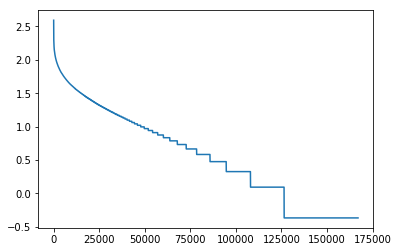

In [162]:
plt.plot(np.log(np.log(words_with_fre)))

## 在大量的文本中，出现次数第二多的单词，它出现的概率是，出现频率最高的单词的1/2，出现频率第三高的单词，频率是最高的单词的1/3,1000 =>1/1000

In [136]:
list(jieba.cut('一加手机5要做市面最轻薄'))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 0.794 seconds.
Prefix dict has been built succesfully.


['一加', '手机', '5', '要', '做', '市面', '最', '轻薄']

In [163]:
_2_gram_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]

In [164]:
_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [165]:
_2_gram_word_counts = Counter(_2_gram_words)

$$ Pr(sentence) = Pr(w_1 \cdot w_2 \cdots w_n) = \prod \frac{count(w_i, w_{i+1})}{count(w_{i+1})}$$


In [170]:
words_count.most_common()[-1][-1]

1

In [171]:
def get_1_gram_count(word):
    if word in words_count:return words_count[word]
    else:
        return words_count.most_common()[-1][-1]

In [172]:
def get_2_gram_count(word):
    if word in _2_gram_word_counts: return _2_gram_word_counts[word]
    else:
        return _2_gram_word_counts.most_common()[-1][-1]

In [173]:
def get_gram_count(word, wc):
    if word in wc: return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [177]:
get_gram_count('XXX',words_count)

3

In [175]:
get_gram_count('XXX', _2_gram_word_counts)

1

In [178]:
def two_gram_model(sentence):
    tokens = cut(sentence)
    
    probability = 1 
    
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]
        
        _two_gram_c = get_gram_count(word+next_word, _2_gram_word_counts)
        _one_gram_c = get_gram_count(next_word, words_count)
        pro =  _two_gram_c / _one_gram_c
        probability *= pro 
        
    return probability

In [185]:
two_gram_model('此外自本周6月12日起除小米手机6等15款机型')

5.461703749621704e-37

In [179]:
two_gram_model('前天早上吃晚饭的时候')

8.228346369245645e-10

In [180]:
two_gram_model('前天早上吃早饭的时候')

3.2358004455062954e-13

In [181]:
two_gram_model('我请你吃日料大餐')

7.249783737138675e-10

In [182]:
two_gram_model('我请你吃火锅')

9.656711937868715e-07

In [183]:
two_gram_model('这个人来自清华大学')

1.7170641916387719e-07

In [184]:
two_gram_model('这个人来自秦华大学')

5.67269691451638e-10

In [186]:
two_gram_model('这个花特别好看')

1.8124288657918754e-09

In [187]:
two_gram_model('花这特别好看')

8.333573073563514e-11